# Bay Wheels Dataset Exploraiton
## by Brad DeFauw

## Investigation Overview

The goal of this presentation is to use information provided by Lyft's Bay Wheels program to gather insights about how age and gender impact ride duraiton.

## Dataset Overview

The dataset that I explored captures trip data for the company Bay Wheels, formerly known as Ford GoBike, a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate, in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. This dataset does an excellent job shedding light on a variety of data, in particular: 
- Trip Duration (seconds)
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('2017-fordgobike-tripdata.csv')
print(bikes.shape)
print(bikes.dtypes)
bikes['duration_min'] = bikes['duration_sec'] / 60
bikes['duration_hr'] = bikes['duration_min'] / 60
bikes['age'] = 2017 - bikes['member_birth_year']
bikes.head()

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min,duration_hr,age
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667,22.252778,30.0
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333,21.888889,52.0
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,762.800000,12.713333,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,1036.200000,17.270000,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,726.716667,12.111944,20.0


In [3]:
short_ride = bikes[bikes['duration_min'] < 61]
short_ride.head()
print(short_ride.describe())
print(short_ride.shape)

        duration_sec  start_station_id  start_station_latitude  \
count  503704.000000     503704.000000           503704.000000   
mean      712.752795         95.005743               37.771706   
std       501.635151         85.681287                0.085832   
min        61.000000          3.000000               37.317298   
25%       376.000000         24.000000               37.773492   
50%       581.000000         67.000000               37.782411   
75%       892.000000        138.000000               37.795392   
max      3659.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            503704.000000   503704.000000         503704.000000   
mean               -122.364159       92.057081             37.771869   
std                   0.105100       84.445283              0.085741   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.00000

In [4]:
short_ride_new = short_ride[short_ride.age < 68].copy()
short_ride_new.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min,duration_hr,age
40974,985,2017-12-13 19:04:29.9710,2017-12-13 19:20:55.4820,269,Telegraph Ave at Carleton St,37.862320,-122.258801,157,65th St at Hollis St,37.846784,-122.291376,3517,Subscriber,1985.0,Female,16.416667,0.273611,32.0
410486,514,2017-08-25 07:58:23.5870,2017-08-25 08:06:58.3370,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,48,2nd St at S Park St,37.782411,-122.392706,2189,Subscriber,1979.0,Male,8.566667,0.142778,38.0
152935,181,2017-11-09 00:20:28.5520,2017-11-09 00:23:29.8440,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1058,Subscriber,1989.0,Male,3.016667,0.050278,28.0
354997,613,2017-09-12 16:55:20.0890,2017-09-12 17:05:33.5970,23,The Embarcadero at Steuart St,37.791464,-122.391034,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1112,Subscriber,1974.0,Male,10.216667,0.170278,43.0
307914,1197,2017-09-26 11:01:37.0970,2017-09-26 11:21:34.8880,37,2nd St at Folsom St,37.785000,-122.395936,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,2285,Customer,1978.0,Male,19.950000,0.332500,39.0


## Visualization 1: Average Birth Year of All Users

Here, we can see a unimodal histogram, with most users' birth years occuring between 1985 and 1990. This graph also shows significant left skew.

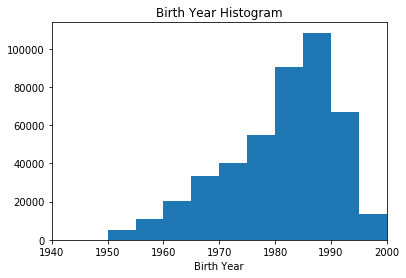

In [5]:
bins = np.arange(0, short_ride_new['member_birth_year'].max()+5, 5)
plt.hist(data = short_ride_new, x = 'member_birth_year', bins = bins);
plt.xlim((1940,2000))
plt.xlabel('Birth Year')
plt.title('Birth Year Histogram');

## Visualization 2: Age vs. Duration

When conducting a bivariate exploration of the data, I initially thought to do a scatterplot of the data. However, due to overplotting it appears that a heat map would be more appropriate for this data. As evidenced, the largest number of rides are happening for users between 25-35 years old at a duration of 5-15 minutes long, with the most users appearing to be just over 30 years old for between 5-10 minutes of ride time. It is interesting to wonder about how this data might look if broken down by gender - a topic that deserves a further look in the next section.

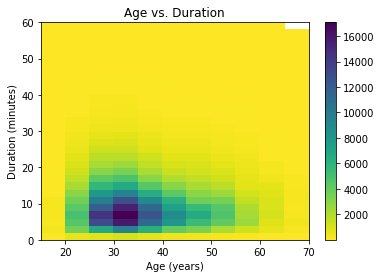

In [6]:
bins_x = np.arange(15, 131+5, 5)
bins_y = np.arange(0, 60+2, 2)
plt.hist2d(data = short_ride_new, x = 'age', y = 'duration_min', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Age (years)')
plt.ylabel('Duration (minutes)')
plt.title('Age vs. Duration')
plt.xlim(15,70);

## Visualization 3: Age vs. Duration, Broken Down By Gender

In this set of heat maps, we notice the following relationships: there seem to be more older men who are using the bicycles for longer. The heat map furthest to the left suggests there are significant numbers of men above the age of thirty who are renting the bicycles; however, for females, there is one cross-section that stands out the most - age 30, duration of 10 minutes is by far the most users for females. While this is also the most common ride age and duration for males, it does not stick out nearly as it does for female riders.

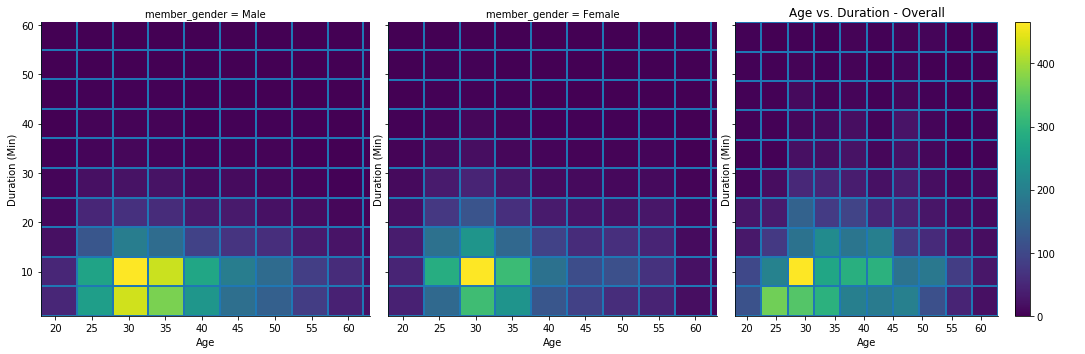

In [7]:
g = sb.FacetGrid(data = short_ride_new, col = 'member_gender', height = 5)
g.map(plt.hist2d, 'age', 'duration_min')
g.add_legend()
g.set(xlabel = "Age", ylabel = "Duration (Min)")
plt.colorbar()
plt.title('Age vs. Duration - Overall');

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle